# Module 1 Challenge - XPe Data Architect postgraduate program
by Karl Richard Busse Filho

Challenge proposed within module 1 of the Data Architect postgraduate program.

## Problem
In a dynamic recruitment scenario, an experienced talent manager realizes the need to improve candidate selection strategies. With the aim of exploring the nuances between professional experience and salaries in various sectors, the manager has taken the initiative to hire a Big Data specialist. Instead of using a linear approach, we will now focus on clustering techniques to enhance the effectiveness of the recruitment process.

In a reality where diversity of professional profiles is the norm, our recruitment manager faces the challenge of understanding complex patterns that go beyond linearity. They seek to understand not only the correlation between experience and salary but also to identify specific groups of candidates who share similar characteristics.

Therefore, instead of a linear regression approach, the Big Data architect will be responsible for creating a clustering model using the K-Means algorithm. This model will segment candidates into distinct groups based on their professional experience and associated salaries.

**Proposed Categories**
- **Beginner**: candidates with a low number of months worked. Initial and entry-level salaries.
- **Intermediate**: candidates with a moderate number of months worked. Salaries corresponding to intermediate experience.
- **Experienced**: candidates with extensive months of experience. Higher salaries reflecting accumulated experience.

Unlike the previous linear model, which anticipated individual salaries, the clustering model will seek to group candidates with common characteristics into one of the proposed categories. The goal is to create broader and more understandable categories, facilitating a more strategic and personalized approach to recruitment.

This project aims not only to understand the relationship between experience and salary but also to transform this understanding into concrete recruitment actions. By transitioning from a linear approach to clustering, our intention is to create a more dynamic and adaptable environment, enabling the recruitment manager to make more strategic and effective decisions. This new approach offers the promise of more accurate candidate selection aligned with the unique needs of each sector.

## Instructions
1. Collect and insert the files into the platform.
2. Analyze the collected data.
3. Evaluate the correlation between the variables.
4. Create a k-means algorithm with the following configurations: `random_state=0` and `init='k-means++'`.
5. Answer the theoretical and practical questions of the assignment.
6. Perform customer segmentation.
7. Analyze the data according to the created clusters.

## Disclaimer
- The data provided in the dataset is fictional and does not have any relation to the real world.

# 1. Setup

## Importing necessary packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go

## Loading datasets

In [2]:
path = "C:\\Users\\karlf\\Downloads\\dados_pessoais.xlsx"

clients = pd.read_excel(path, dtype={'genero':'category'})
display(clients.head())

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26


In [3]:
path = "C:\\Users\\karlf\\Downloads\\estados_brasileiros.csv"

states = pd.read_csv(path, delimiter=';', encoding='Latin-1')
display(states.head())

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


In [4]:
path = "C:\\Users\\karlf\\Downloads\\idade_clientes.csv"

age = pd.read_csv(path, delimiter=';', encoding='Latin-1')
display(age.head())

,id_cliente,idade
0,1,17
1,2,28
2,3,62
3,4,55
4,5,44


In [5]:
path = "C:\\Users\\karlf\\Downloads\\Experience-Salary.csv"
col_names = ['id_cliente', 'experiencia', 'salario']

salary = pd.read_csv(path, skiprows=1, names=col_names)
print(salary.head())

   id_cliente  experiencia    salario
0           1    18.290293  16.521825
1           2    17.023407  11.666234
2           3    26.343613  23.167255
3           4    19.105834  20.877145
4           5    27.742516  23.166236


### Datasets dictionaries

**`clients` dataframe**
- `id_cliente`: integer, registry key for clients.
- `peso`: float, weight in kilograms (kg).
- `colesterol`: float, serum cholesterol in mg/dL.
- `genero`: category, client genre; 'Masculino' is male and 'Feminino' is female.
- `id_estado`: integer, registry code for brazilian states.

**`states` dataframe**
- `id_estado`: integer, registry code for brazilian states.
- `estado`: string, state name.
- `sigla_estado`: string, state abbreviation.
- `pais`: string, literally means 'country' and its only value is 'Brasil'; will be dropped and substituted for `region` later.

**`age` dataframe**
- `id_cliente`: integer, registry key for clients.
- `idade`: integer, means 'age'. 

**`salary` dataframe**
- `id_cliente`: integer,  registry key for clients.
- `experiencia`: float, experience in months.
- `salario`: float, salary in thousands of USD.

## Data cleaning, validating and joining

### `clients` dataframe

In [6]:
# Basic info
display(clients.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id_cliente  547 non-null    int64   
 1   peso        542 non-null    float64 
 2   colesterol  547 non-null    int64   
 3   genero      547 non-null    category
 4   id_estado   547 non-null    int64   
dtypes: category(1), float64(1), int64(3)
memory usage: 17.9 KB


None

In [7]:
# Checking for null values
clients.isna().sum()

id_cliente    0
peso          5
colesterol    0
genero        0
id_estado     0
dtype: int64

In [8]:
# Fixing null values
## Earlier my teacher instructed to use the median to fix null numeric variables.
peso_median = clients['peso'].median()

clients['peso'].fillna(peso_median, inplace=True)
clients.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [9]:
# Checking for duplicate values
duplicated_id = clients['id_cliente'].duplicated()
print(clients[duplicated_id])

Empty DataFrame
Columns: [id_cliente, peso, colesterol, genero, id_estado]
Index: []


In [10]:
# Validating `peso` column
clients['peso'].describe()

## - Although a max weight of 203 kg (447.54 lb) seems unlikely, it is still plausible.
## - We are probably dealing with fat people.

count    547.000000
mean     143.409506
std       30.697098
min       95.000000
25%      116.000000
50%      140.000000
75%      171.000000
max      203.000000
Name: peso, dtype: float64

In [11]:
# Validating `colesterol` column
clients['colesterol'].describe()

count    547.000000
mean     170.433272
std       39.147189
min      102.000000
25%      136.000000
50%      169.000000
75%      208.000000
max      235.000000
Name: colesterol, dtype: float64

In [12]:
# Validating `genero` column
display(clients['genero'].describe())
display(clients['genero'].unique())
clients['genero'].dtype

count           547
unique            2
top       Masculino
freq            281
Name: genero, dtype: object

['Masculino', 'Feminino']
Categories (2, object): ['Feminino', 'Masculino']

CategoricalDtype(categories=['Feminino', 'Masculino'], ordered=False)

In [13]:
# Validating `id_estado` column
clients['id_estado'].nunique()

27

### `states` dataframe

In [14]:
# Basic info
states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estado     27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          25 non-null     object
dtypes: int64(1), object(3)
memory usage: 996.0+ bytes


In [15]:
# Checking for null values
states.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            2
dtype: int64

In [16]:
# Checking for duplicated values
display(states[states.id_estado.duplicated()])
display(states[states.estado.duplicated()])
display(states[states.sigla_estado.duplicated()])

,id_estado,estado,sigla_estado,pais


,id_estado,estado,sigla_estado,pais


,id_estado,estado,sigla_estado,pais


In [17]:
# Validating `id_estado` column
states['id_estado'].nunique()

## expected output: 27

27

In [18]:
# Validating `estado` column
display(states['estado'].describe())
display(states['estado'].unique())

## expected output: 27 unique

count       27
unique      27
top       Acre
freq         1
Name: estado, dtype: object

array(['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará',
       'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Pará',
       'Paraíba', 'Paraná', 'Pernambuco', 'Piauí', 'Rio de Janeiro',
       'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondônia', 'Roraima',
       'Santa Catarina', 'São Paulo', 'Sergipe', 'Tocantins'],
      dtype=object)

In [19]:
# Validating `sigla_estado` column
display(states['sigla_estado'].describe())
display(states['sigla_estado'].unique())

## making all abbreviations uppercase
states['sigla_estado'] = states['sigla_estado'].str.upper()
display(states['sigla_estado'].unique())

## expected output: 27 unique abbreviations

count     27
unique    27
top       ac
freq       1
Name: sigla_estado, dtype: object

array(['ac', 'al', 'ap', 'am', 'ba', 'ce', 'df', 'es', 'go', 'ma', 'mt',
       'ms', 'mg', 'pa', 'pb', 'pr', 'pe', 'pi', 'rj', 'rn', 'rs', 'ro',
       'rr', 'sc', 'sp', 'se', 'to'], dtype=object)

array(['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT',
       'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO',
       'RR', 'SC', 'SP', 'SE', 'TO'], dtype=object)

In [20]:
# Dropping `pais` column and creating `regiao` categorical column, which means 'region'
states.drop('pais', axis=1, inplace=True)

def region_map(abb):
    regions = {
        'Norte': ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO'],
        'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
        'Sudeste': ['ES', 'MG', 'RJ', 'SP'],
        'Sul': ['PR', 'RS', 'SC'],
        'Centro-Oeste': ['DF', 'GO', 'MS', 'MT']
    }
    for region, abbreviations in regions.items():
        if abb in abbreviations:
            return region
    return 'Unknown'

states['regiao'] = states['sigla_estado'].apply(region_map)
display(states.head())

# Making it categorical type
states['regiao'] = states['regiao'].astype('category')
print(states['regiao'].dtype)

,id_estado,estado,sigla_estado,regiao
0,1,Acre,AC,Norte
1,2,Alagoas,AL,Nordeste
2,3,Amapá,AP,Norte
3,4,Amazonas,AM,Norte
4,5,Bahia,BA,Nordeste


category


### `age` dataframe

In [21]:
# Basic info
age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_cliente  547 non-null    int64
 1   idade       547 non-null    int64
dtypes: int64(2)
memory usage: 8.7 KB


In [22]:
# Checking for null values
age.isna().sum()

id_cliente    0
idade         0
dtype: int64

In [23]:
# Checking for duplicated values
display(age[age.id_cliente.duplicated()])

,id_cliente,idade


In [24]:
# Validating `idade` column
age.idade.describe()

count    547.000000
mean      42.791590
std       15.160209
min       16.000000
25%       30.000000
50%       42.000000
75%       55.000000
max       70.000000
Name: idade, dtype: float64

### `salary` dataframe

In [25]:
# Basic info
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_cliente   1000 non-null   int64  
 1   experiencia  1000 non-null   float64
 2   salario      1000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [26]:
# Checking for null values
salary.isna().sum()

id_cliente     0
experiencia    0
salario        0
dtype: int64

In [27]:
# Checking for duplicated values
display(salary[salary.id_cliente.duplicated()])

,id_cliente,experiencia,salario


In [28]:
# Validating `experiencia` column
salary.experiencia.describe()

count    1000.000000
mean       26.157825
std         8.717091
min         0.697594
25%        20.073600
50%        25.875225
75%        32.406986
max        49.463222
Name: experiencia, dtype: float64

In [29]:
# Validating `salario` column
display(salary.salario.describe())

## Looks like there's negative salaries! Let's check them out
negative_salaries = salary[salary.salario <= 0]
print('\nRows with negative or zero salaries')
display(negative_salaries)

## After asking the professor about this problem, I was instructed to keep the negative salaries.

count    1000.000000
mean       26.722597
std         8.844761
min        -1.276342
25%        20.531008
50%        26.745576
75%        32.615753
max        55.297016
Name: salario, dtype: float64


Rows with negative or zero salaries


,id_cliente,experiencia,salario
133,134,8.520651,-1.276342
772,773,2.882022,-0.074563


### Joining dataframes

In [30]:
# First merge between 'clients' and 'states' on 'id_estado'
merged_df = pd.merge(clients, states, on='id_estado')

# Second merge between 'merged_df' and 'age' on 'id_cliente'
df = pd.merge(merged_df, age, on='id_cliente')

# Checking resulting dataframe
display(df.head())

# Checking for duplicated rows
display(df[df.duplicated()])

,id_cliente,peso,colesterol,genero,id_estado,estado,sigla_estado,regiao,idade
0,1,102.0,111,Masculino,23,Roraima,RR,Norte,17
1,54,149.0,183,Masculino,23,Roraima,RR,Norte,48
2,61,113.0,129,Feminino,23,Roraima,RR,Norte,70
3,147,140.0,171,Masculino,23,Roraima,RR,Norte,40
4,154,134.0,162,Feminino,23,Roraima,RR,Norte,26


,id_cliente,peso,colesterol,genero,id_estado,estado,sigla_estado,regiao,idade


In [31]:
# Final merge
final_df = df.merge(salary, on='id_cliente', how='left')

# Checking final_df
final_df.head()

,id_cliente,peso,colesterol,genero,id_estado,estado,sigla_estado,regiao,idade,experiencia,salario
0,1,102.0,111,Masculino,23,Roraima,RR,Norte,17,18.290293,16.521825
1,54,149.0,183,Masculino,23,Roraima,RR,Norte,48,33.723395,41.540865
2,61,113.0,129,Feminino,23,Roraima,RR,Norte,70,17.060087,12.949522
3,147,140.0,171,Masculino,23,Roraima,RR,Norte,40,19.525438,22.227984
4,154,134.0,162,Feminino,23,Roraima,RR,Norte,26,16.021363,15.872766


# 2. Exploratory Data Analysis (EDA)

## Statistical summaries

In [32]:
# Numerical variables
display(final_df['peso'].describe())

count    547.000000
mean     143.409506
std       30.697098
min       95.000000
25%      116.000000
50%      140.000000
75%      171.000000
max      203.000000
Name: peso, dtype: float64

In [33]:
display(final_df['colesterol'].describe())

count    547.000000
mean     170.433272
std       39.147189
min      102.000000
25%      136.000000
50%      169.000000
75%      208.000000
max      235.000000
Name: colesterol, dtype: float64

In [34]:
display(final_df['experiencia'].describe())

count    547.000000
mean      26.018597
std        8.851570
min        0.697594
25%       19.927422
50%       25.987551
75%       32.101135
max       49.463222
Name: experiencia, dtype: float64

In [35]:
display(final_df['salario'].describe())

count    547.000000
mean      26.630585
std        9.097362
min       -1.276342
25%       20.034048
50%       26.753085
75%       32.672483
max       55.297016
Name: salario, dtype: float64

In [36]:
# Categorical variables
display(final_df['genero'].describe())
display(final_df['genero'].value_counts(normalize=True))

count           547
unique            2
top       Masculino
freq            281
Name: genero, dtype: object

genero
Masculino    0.513711
Feminino     0.486289
Name: proportion, dtype: float64

In [37]:
display(final_df.estado.describe())
display(final_df.estado.value_counts(normalize=True))

count              547
unique              27
top       Minas Gerais
freq                27
Name: estado, dtype: object

estado
Minas Gerais           0.049360
Ceará                  0.045704
Amazonas               0.045704
Rio Grande do Norte    0.043876
Rio de Janeiro         0.042048
Goiás                  0.042048
Piauí                  0.042048
Distrito Federal       0.040219
Maranhão               0.040219
Mato Grosso do Sul     0.040219
Santa Catarina         0.040219
Rio Grande do Sul      0.038391
Pará                   0.038391
Alagoas                0.038391
Amapá                  0.038391
Rondônia               0.036563
Tocantins              0.034735
Sergipe                0.034735
Roraima                0.032907
Mato Grosso            0.032907
Paraná                 0.032907
Espírito Santo         0.032907
Bahia                  0.032907
Pernambuco             0.031079
Paraíba                0.029250
Acre                   0.021938
São Paulo              0.021938
Name: proportion, dtype: float64

In [38]:
display(final_df.regiao.describe())
display(final_df.regiao.value_counts(normalize=True))

count          547
unique           5
top       Nordeste
freq           185
Name: regiao, dtype: object

regiao
Nordeste        0.338208
Norte           0.248629
Centro-Oeste    0.155393
Sudeste         0.146252
Sul             0.111517
Name: proportion, dtype: float64

## Numerical data distribution

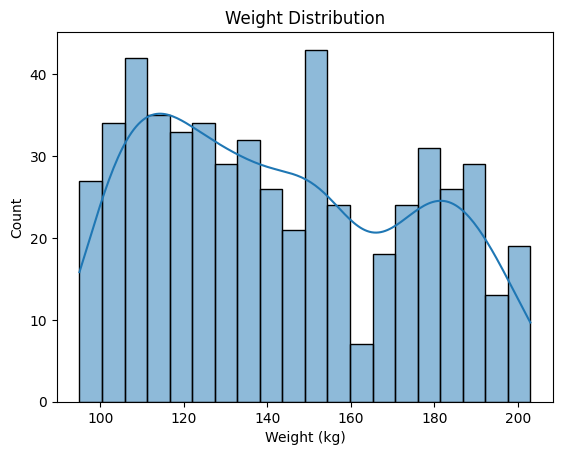

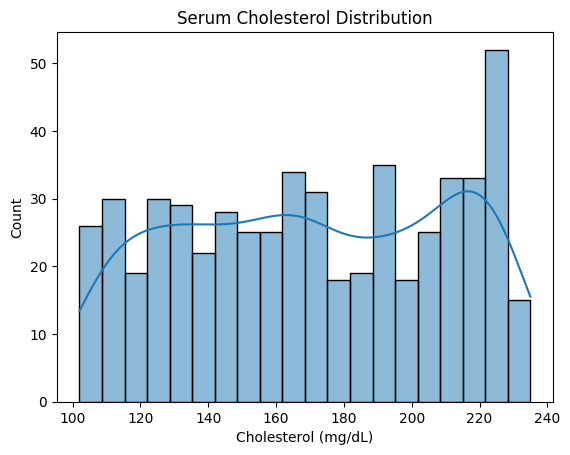

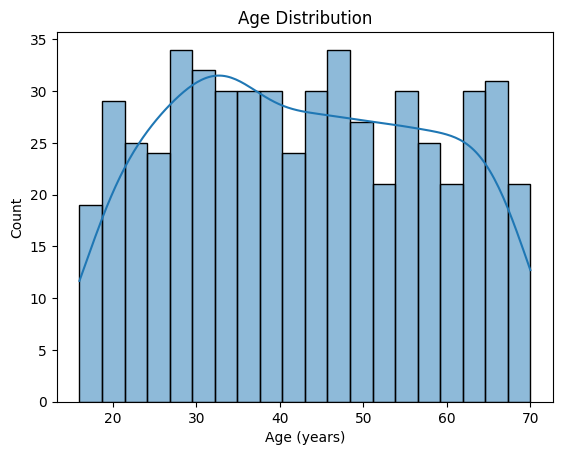

In [39]:
# Histogram for 'peso' column
sns.histplot(final_df['peso'], bins=20, kde=True)
plt.title('Weight Distribution')
plt.xlabel('Weight (kg)')
plt.show()

# Histogram for 'colesterol' column
sns.histplot(final_df['colesterol'], bins=20, kde=True)
plt.title('Serum Cholesterol Distribution')
plt.xlabel('Cholesterol (mg/dL)')
plt.show()

# Histogram for 'idade' column
sns.histplot(final_df['idade'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age (years)')
plt.show()


## Categorical data distribution

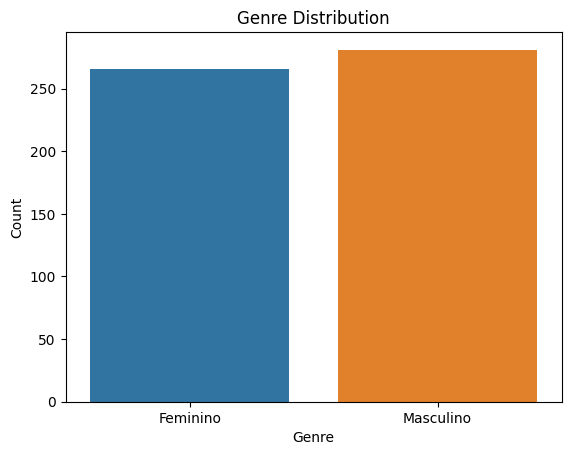

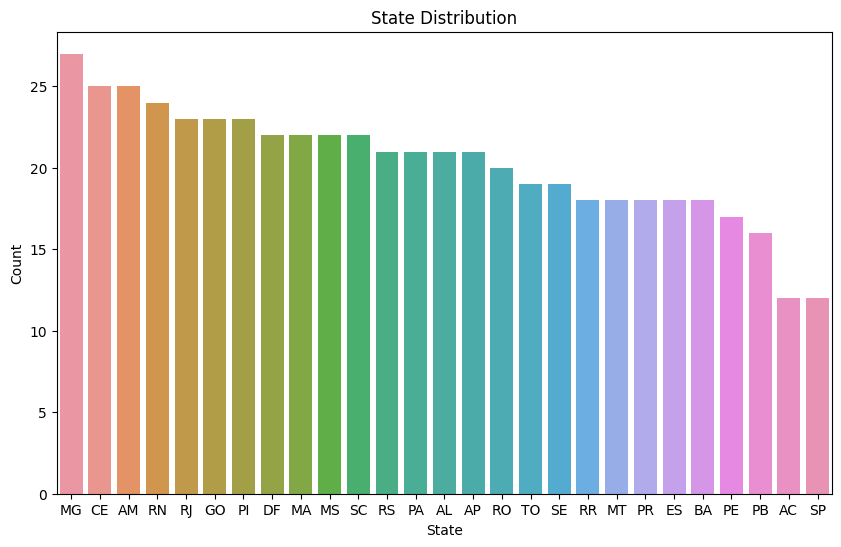

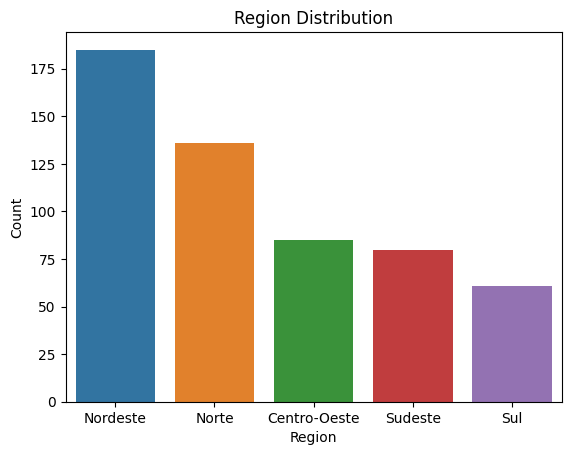

In [40]:
# Barplot for 'genero' column
sns.countplot(x='genero', data=final_df)
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

# Barplot for 'sigla_estado' column
order = final_df['sigla_estado'].value_counts().index

plt.figure(figsize=(10, 6))
sns.countplot(x='sigla_estado', data=final_df, order=order)
plt.title('State Distribution')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

# Barplot for 'region' column
orderRegion = df['regiao'].value_counts().index

sns.countplot(x='regiao', data=final_df, order=orderRegion)
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()


## Relationship between variables

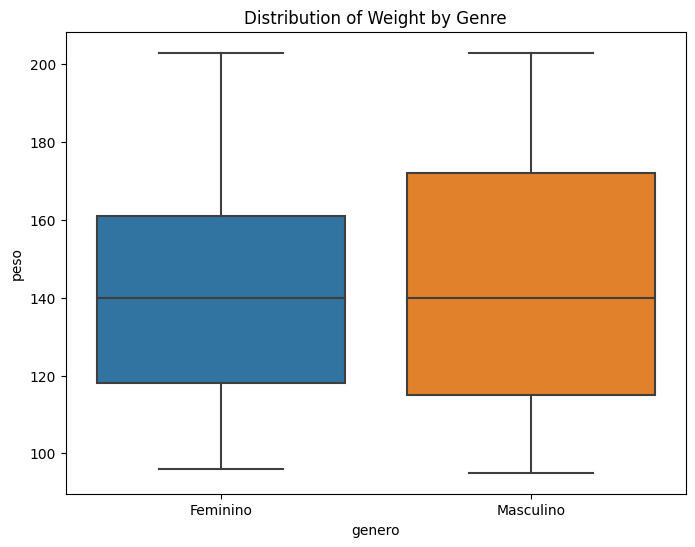

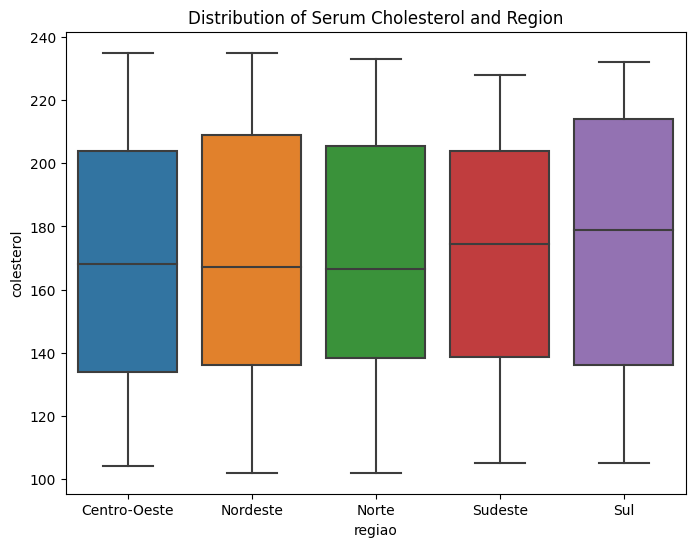

In [41]:
# Boxplot for 'peso' and 'genero'
plt.figure(figsize=(8, 6))
sns.boxplot(x='genero', y='peso', data=final_df)
plt.title('Distribution of Weight by Genre')
plt.show()

# Boxplot 'colesterol' and 'regiao' -- can't get enough of violinplots...
plt.figure(figsize=(8, 6))
sns.boxplot(x='regiao', y='colesterol', data=final_df)
plt.title('Distribution of Serum Cholesterol and Region')
plt.show()


# 3. Variables correlations
This section is dedicated exclusively to the analysis of variable correlations, as per the specific instructions received.

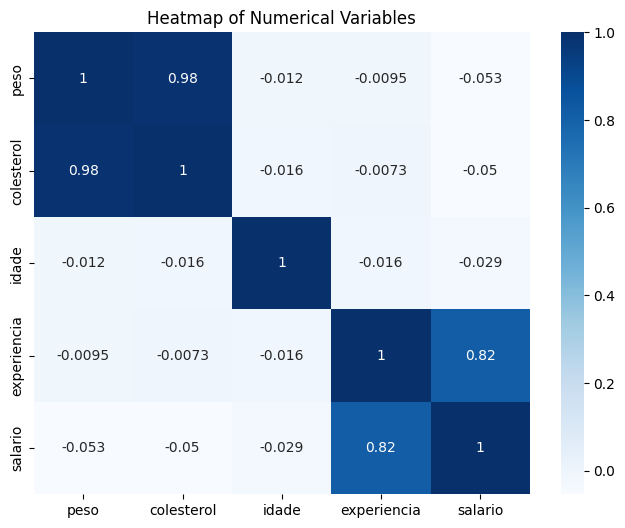

In [42]:
# Correlation matrix calculations
cols = final_df[['peso', 'colesterol', 'idade', 'experiencia', 'salario']]
corr_matrix = cols.corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Heatmap of Numerical Variables')
plt.show()


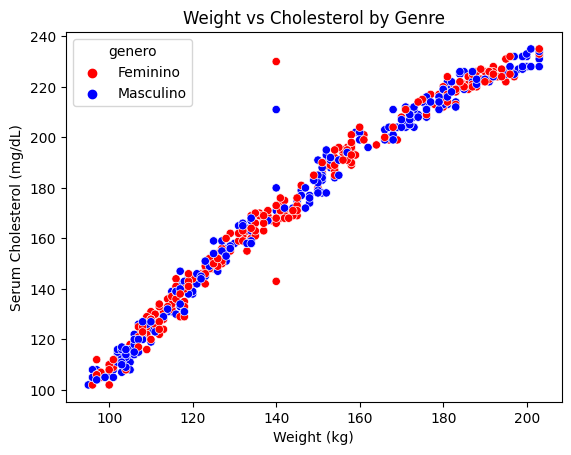

In [43]:
# 'hue' color dictionary
palette = {'Feminino': 'red', 'Masculino': 'blue'}

# Scatterplot weight vs cholesterol
sns.scatterplot(x='peso', y='colesterol', hue='genero', data=final_df, palette=palette)
plt.title('Weight vs Cholesterol by Genre')
plt.xlabel('Weight (kg)')
plt.ylabel('Serum Cholesterol (mg/dL)')

# Exibir o gráfico
plt.show()


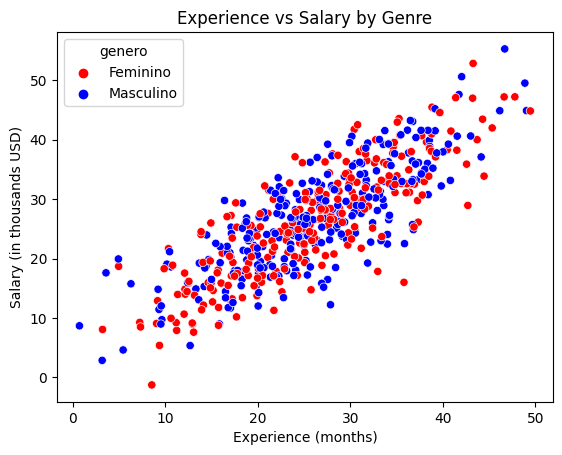

In [44]:
# Scatterplot experience vs salary
sns.scatterplot(x='experiencia', y='salario', hue='genero', data=final_df, palette=palette)
plt.title('Experience vs Salary by Genre')
plt.xlabel('Experience (months)')
plt.ylabel('Salary (in thousands USD)')

# Exibir o gráfico
plt.show()

# 4. K-means
Instructions: use `random_state=0` and `init='k-means++'`

### Weight vs Cholesterol

In [45]:
# Choosing features
samples_df = final_df[['peso', 'colesterol']]

# Preprocessing
scaler = StandardScaler()
samples_df = scaler.fit_transform(samples_df)


c:\Users\karlf\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\karlf\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


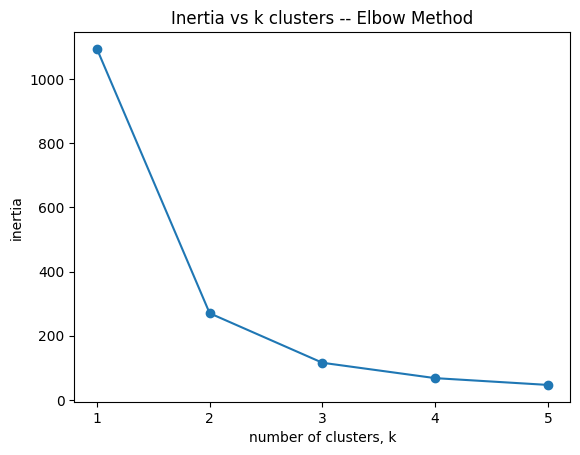

In [46]:
# Plotting inertia plot for elbow method
ks = range(1,6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model_df = KMeans(n_clusters=k, n_init=10, random_state=0, init='k-means++')
    
    # Fit model to samples
    model_df.fit(samples_df)
    
    # Append the inertia to the list of inertias
    inertias.append(model_df.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.title('Inertia vs k clusters -- Elbow Method')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [47]:
# Fitting the model with 3 clusters
model_df = KMeans(n_clusters=3, random_state=0, init='k-means++', n_init=10)
labels_df = model_df.fit_predict(samples_df)

# Checking labels
print(labels_df)

[2 1 2 1 1 1 2 1 2 2 1 0 0 2 1 0 2 2 2 1 0 1 1 0 2 0 0 0 2 0 0 1 0 2 2 2 2
 0 2 0 2 2 2 0 2 2 2 2 0 0 2 0 2 0 0 2 1 0 2 1 1 2 2 1 0 1 2 0 0 1 1 1 1 1
 0 2 1 1 2 1 2 1 2 0 2 0 0 1 2 1 2 2 1 2 0 0 0 0 2 1 1 1 0 1 0 2 0 0 2 1 2
 0 2 0 1 0 1 1 1 1 0 1 2 1 1 1 1 0 0 2 0 2 2 1 1 0 0 2 1 1 2 1 2 1 2 1 0 2
 0 2 0 0 0 2 0 0 0 1 2 0 0 1 1 2 2 2 1 1 0 1 2 2 0 1 1 0 2 1 2 2 2 2 1 1 2
 2 0 2 1 0 0 0 0 2 2 0 1 2 0 1 2 1 0 0 2 1 1 0 1 1 2 2 0 1 0 1 0 0 0 0 0 1
 0 2 2 1 2 0 0 2 1 1 2 1 0 1 0 0 0 0 2 2 1 0 2 2 1 1 1 2 2 0 0 2 1 1 1 1 1
 1 0 2 2 0 2 2 0 1 0 2 1 2 2 1 1 2 0 2 2 1 1 1 2 2 0 2 1 1 0 0 1 0 1 0 0 0
 2 1 0 2 0 1 0 0 1 2 2 2 0 1 2 2 1 1 2 0 0 0 0 0 0 0 0 2 0 2 2 1 0 1 0 1 0
 2 2 2 0 1 1 2 0 1 2 2 0 0 2 0 2 1 2 2 2 1 0 1 0 1 1 2 2 0 1 1 0 0 0 0 0 0
 0 1 1 0 2 1 2 2 0 0 0 1 0 2 2 2 2 2 1 1 2 1 2 0 1 0 2 1 0 2 1 0 0 2 1 0 1
 2 2 2 1 1 0 1 1 2 1 0 2 2 2 0 1 1 1 0 1 2 2 1 2 1 2 2 1 0 1 2 2 0 1 0 0 0
 2 0 2 0 2 1 1 2 2 1 1 0 1 2 1 1 2 0 2 0 0 2 1 2 1 2 2 1 0 1 1 2 0 2 1 1 2
 1 1 2 2 2 2 1 0 1 1 1 2 

In [48]:
# Clustering scatterplot
centroids_df = model_df.cluster_centers_

samples_plot = px.scatter(x=samples_df[:,0], y=samples_df[:,1], color=labels_df)
centroids_plot = px.scatter(x=centroids_df[:,0], y=centroids_df[:,1], size=[7,7,7])
final_plot = go.Figure(data=samples_plot.data + centroids_plot.data)
final_plot.show()

### Experience vs Salary

In [49]:
# Choosing the features
df_salary = final_df[['experiencia', 'salario']]
df_salary = scaler.fit_transform(df_salary)

In [50]:
# Finding # of clusters using the elbow method (WCSS)
wcss_salary = []

for i in range(1,11):
    model_salary = KMeans(n_clusters=i, random_state=0, n_init=10, init='k-means++')
    model_salary.fit_predict(df_salary)
    wcss_salary.append(model_salary.inertia_)

# Visualizing WCSS values
for i in range(len(wcss_salary)):
    print('Cluster:', i, '- WCSS value:', wcss_salary[i])

Cluster: 0 - WCSS value: 1094.0000000000002
Cluster: 1 - WCSS value: 451.5192164245342
Cluster: 2 - WCSS value: 277.96104172523303
Cluster: 3 - WCSS value: 211.22094025149246
Cluster: 4 - WCSS value: 172.18708629962325
Cluster: 5 - WCSS value: 150.9794368399773
Cluster: 6 - WCSS value: 131.4705470192416
Cluster: 7 - WCSS value: 116.05147816000522
Cluster: 8 - WCSS value: 102.52871966580958
Cluster: 9 - WCSS value: 91.09264401553529


In [51]:
# Plotting WCSS values
plot = px.line(x= range(1,11), y= wcss_salary)
plot.show()

In [52]:
model_salary = KMeans(n_clusters=3, random_state=0, init='k-means++', n_init=10)
labels_salary = model_salary.fit_predict(df_salary)
centroids_salary = model_salary.cluster_centers_

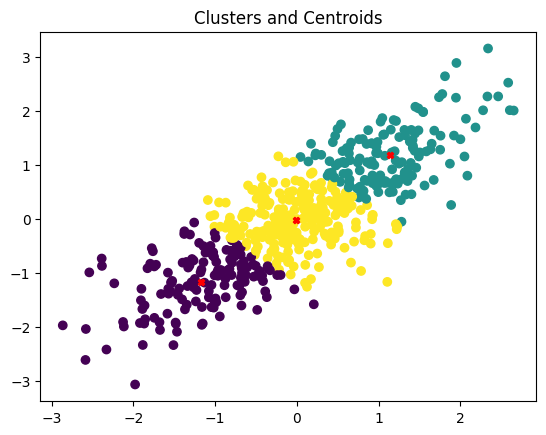

In [53]:
plt.scatter(df_salary[:,0], df_salary[:,1], c=labels_salary)
plt.scatter(centroids_salary[:, 0], centroids_salary[:, 1], c='red', marker='X', s=20)
plt.title('Clusters and Centroids')
plt.show()

# 5. Questions & Answers
In order answer the challenge questions, I'll have to cluster another dataset, `salary`, using KMeans. At this point you may be confused as why I'm using a serum cholesterol vs weight dataset, and why I merged them. The answer is they messed things up and now is up to me sort things out. Believe me, I'm as angry as you.

Q. 6 -- After applying the clustering algorithm, generate a statistic with the describe function for the cholesterol variable, grouping the results by cluster.

In [56]:
# Creating the labels column
final_df['cluster'] = labels_salary

# Renaming labels
label_mapping = {0:'Beginner', 1:'Intermediate', 2:'Experienced'}

final_df['cluster'] = final_df['cluster'].replace(label_mapping)

# Fixing dtype
final_df['cluster'] = pd.Categorical(final_df['cluster'], categories=['Beginner', 'Intermediate', 'Experienced'], ordered=True)

# Grouping by clusters and applying stats
clustered_stats = final_df.groupby('cluster')[['colesterol', 'peso']].describe()
display(clustered_stats)

colesterol                                                       \
                  count        mean        std    min     25%    50%     75%   
cluster                                                                        
Beginner          148.0  170.844595  40.390730  102.0  135.00  169.0  208.25   
Intermediate      153.0  167.633987  36.799376  102.0  142.00  164.0  199.00   
Experienced       246.0  171.926829  39.862963  102.0  133.25  173.0  211.00   

                      peso                                                     \
                max  count        mean        std   min     25%    50%    75%   
cluster                                                                         
Beginner      235.0  148.0  143.939189  31.212292  97.0  116.75  140.0  171.5   
Intermediate  235.0  153.0  141.111111  29.155110  96.0  119.00  134.0  166.0   
Experienced   234.0  246.0  144.520325  31.359495  95.0  115.00  143.0  172.0   

                     
                max  
cluster              
Beginner      203.0  
Intermediate  203.0  
Experienced   203.0

Q. 7 -- Generate a boxplot diagram filtering for all female genders from the created database and indicate the result for the salary variable and the cluster name.

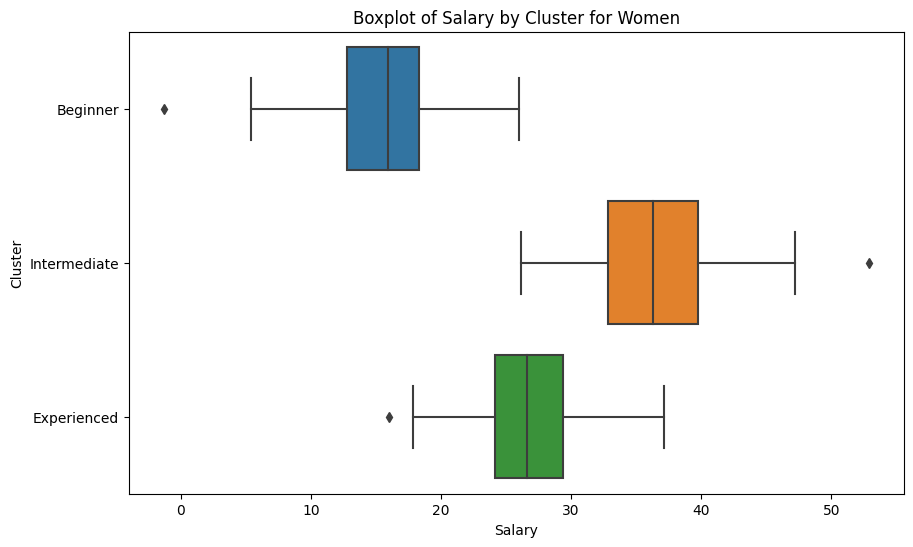

In [63]:
# Filtering for genre = Feminino
df_feminino = final_df[final_df['genero'] == 'Feminino']

# Making a boxplot for 'salario' by 'cluster' 
plt.figure(figsize=(10, 6))
sns.boxplot(x='salario', y='cluster', data=df_feminino)

plt.title('Boxplot of Salary by Cluster for Women')
plt.ylabel('Cluster')
plt.xlabel('Salary')

plt.show()

Q. 8 -- How many females are in the Intermediate cluster?

In [66]:
# Counting the number of females in the Intermediate cluster
num_females_intermediate = final_df[(final_df['genero'] == 'Feminino') & (final_df['cluster'] == 'Intermediate')].shape[0]

print(f"Number of females in the Intermediate cluster: {num_females_intermediate}")


Number of females in the Intermediate cluster: 80


Q. 9 -- Which state has the highest number of people in the Experienced cluster?

In [67]:
# Finding the state with the highest number of people in the Experienced cluster
state_counts = final_df[final_df['cluster'] == 'Experienced']['estado'].value_counts()
state_with_most_experienced = state_counts.idxmax()

print(f"The state with the highest number of people in the Experienced cluster is: {state_with_most_experienced}")


The state with the highest number of people in the Experienced cluster is: Distrito Federal


Q. 10 -- What is the third state with the highest average cholesterol level?

In [68]:
# Calculating the average cholesterol level by state and finding the third highest
average_cholesterol_by_state = final_df.groupby('estado')['colesterol'].mean()
third_highest_cholesterol_state = average_cholesterol_by_state.sort_values(ascending=False).index[2]

print(f"The third state with the highest average cholesterol level is: {third_highest_cholesterol_state}")


The third state with the highest average cholesterol level is: Pernambuco


Q. 11 -- Filter the DataFrame for all females in the Beginner cluster and then create a histogram with the weight variable for this subset of data. Use 15 bars in the representation of the graph

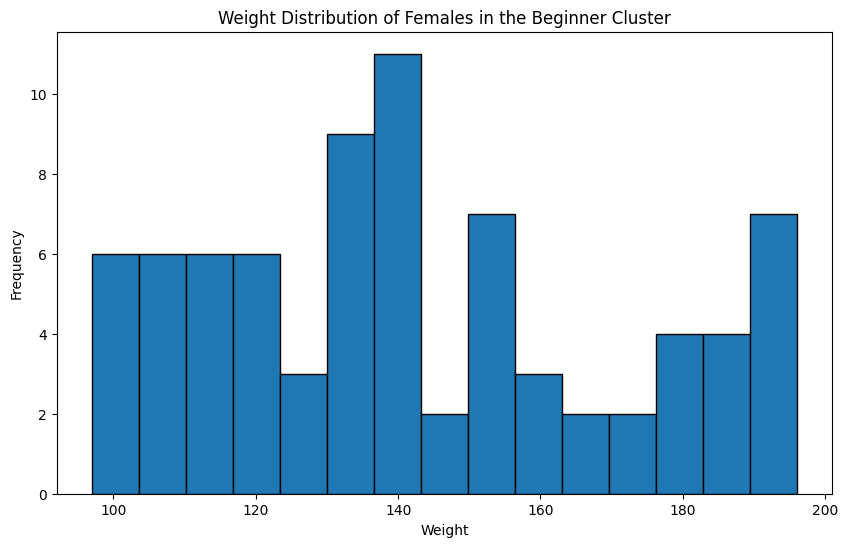

In [70]:
# Filtering the DataFrame for females in the Beginner cluster
female_beginner_df = final_df[(final_df['genero'] == 'Feminino') & (final_df['cluster'] == 'Beginner')]

# Creating a histogram for the 'weight' variable
plt.figure(figsize=(10, 6))
plt.hist(female_beginner_df['peso'], bins=15, edgecolor='black')

plt.title('Weight Distribution of Females in the Beginner Cluster')
plt.xlabel('Weight')
plt.ylabel('Frequency')

plt.show()
